# Project, Phase 2
## Objectives
1. The trend in the movie sales overtime
2. Market segments to venture in.
3. Genres and the differences in popularity
4. Runtime effect on popularity

In [87]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
df1 = pd.read_csv("../DATA/bom.movie_gross.csv")
df1.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [89]:
df1.dropna(inplace = True)

In [90]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


In [91]:
df1['foreign_gross'] = df1['foreign_gross'].str.replace(',','').astype('float')
df1.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [92]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            2007 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 94.1+ KB


In [93]:
df1['combined_gross'] = df1['domestic_gross'] + df1['foreign_gross']
df1.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year',
       'combined_gross'],
      dtype='object')

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


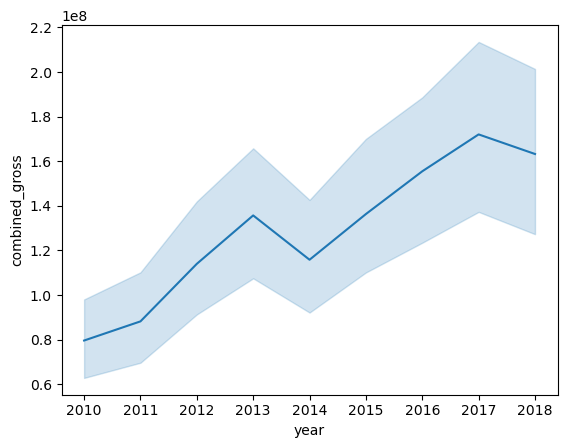

In [94]:
fig, ax = plt.subplots()
sns.lineplot(x = df1['year'],y = df1['combined_gross']);

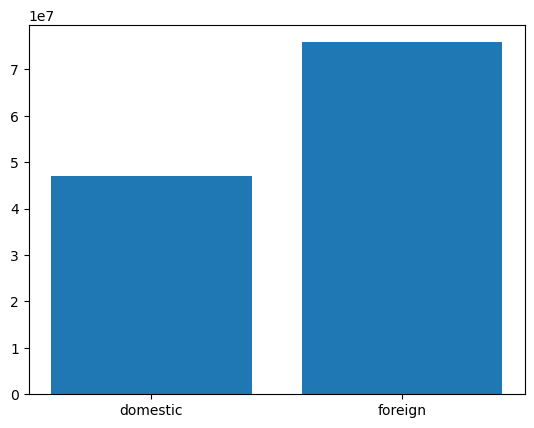

In [95]:
x = ['domestic','foreign']
y = [df1['domestic_gross'].mean(),df1['foreign_gross'].mean()]
fig, ax = plt.subplots()
ax.bar(x,y);

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


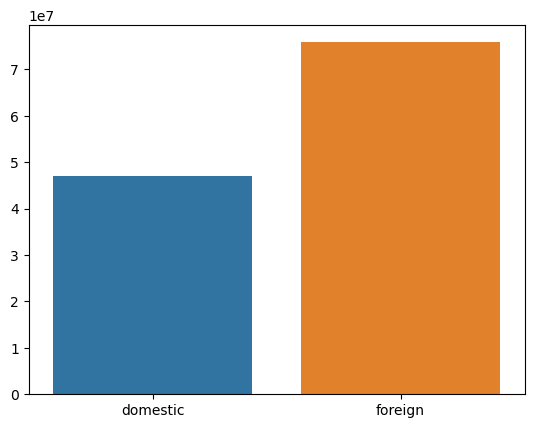

In [96]:
x = ['domestic','foreign']
y = [df1['domestic_gross'].mean(),df1['foreign_gross'].mean()]
fig = plt.figure()
sns.barplot(x =x, y = y);

In [97]:
df1['studio'].nunique()

172

In [98]:
studio = df1.groupby(['studio'])[['combined_gross','domestic_gross','foreign_gross']].mean().sort_values('combined_gross',ascending = False)
studio

,combined_gross,domestic_gross,foreign_gross
studio,,,
HC,8.703000e+08,2.700000e+06,8.676000e+08
P/DW,5.076500e+08,1.682900e+08,3.393600e+08
BV,4.249075e+08,1.768897e+08,2.480178e+08
GrtIndia,2.542000e+08,2.020000e+07,2.340000e+08
WB,2.368577e+08,9.325846e+07,1.435993e+08
...,...,...,...
Darin Southa,9.840000e+04,9.320000e+04,5.200000e+03
ICir,7.960000e+04,7.320000e+04,6.400000e+03
ITL,5.290000e+04,4.110000e+04,1.180000e+04


C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

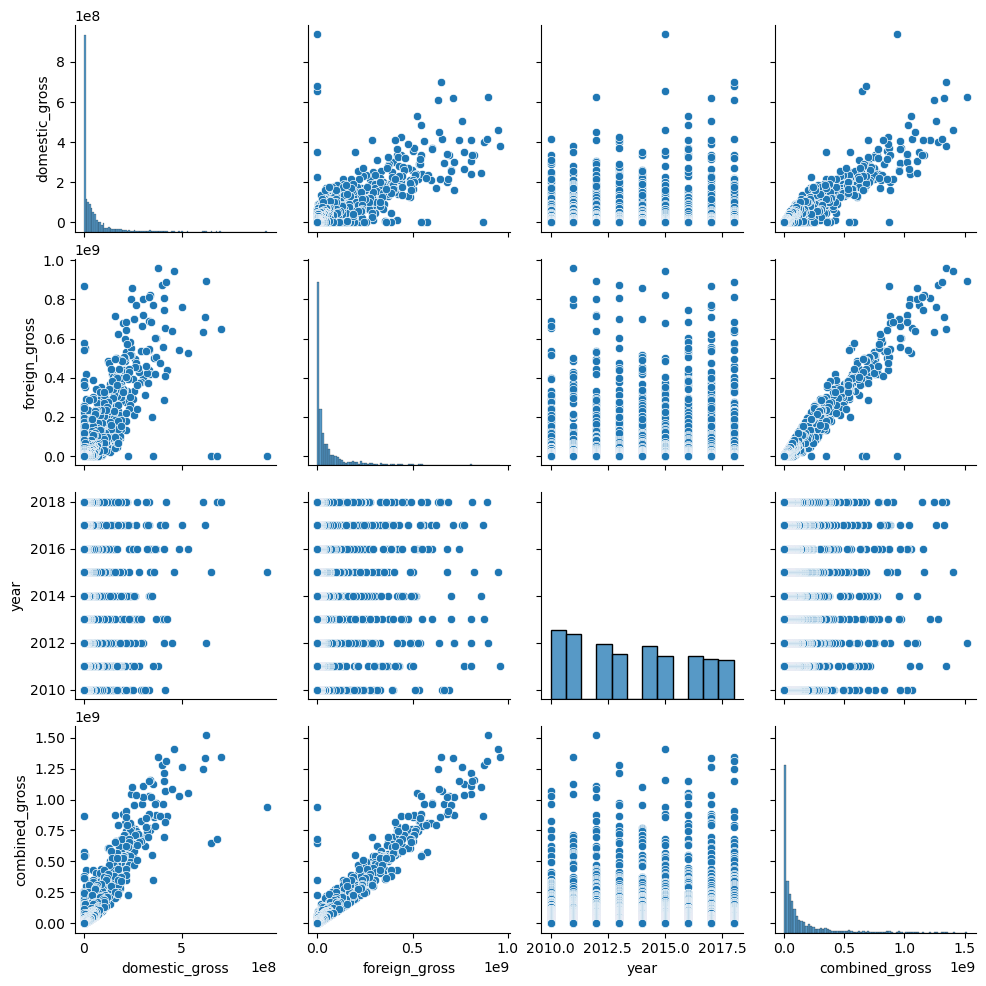

In [99]:
sns.pairplot(df1);

In [100]:
conn = sqlite3.connect('../DATA/im.db')

In [101]:
pd.read_sql('''
            SELECT name FROM sqlite_master
            WHERE type = 'table'
            ''',conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [102]:
query = '''SELECT title,start_year,runtime_minutes,
            genres,averagerating AS rating,
            numvotes
            FROM movie_basics
            LEFT JOIN movie_ratings
            USING(movie_id)
            LEFT JOIN movie_akas
            USING(movie_id)
            WHERE runtime_minutes < 1500
            '''
df2 = pd.read_sql(query,conn)
df2.head()

,title,start_year,runtime_minutes,genres,rating,numvotes
0,Sangharsh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,Sungharsh,2013,175.0,"Action,Crime,Drama",7.0,77.0
2,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
3,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
4,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0


In [103]:
df2.dropna(inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249717 entries, 0 to 314172
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   title            249717 non-null  object 
 1   start_year       249717 non-null  int64  
 2   runtime_minutes  249717 non-null  float64
 3   genres           249717 non-null  object 
 4   rating           249717 non-null  float64
 5   numvotes         249717 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 13.3+ MB


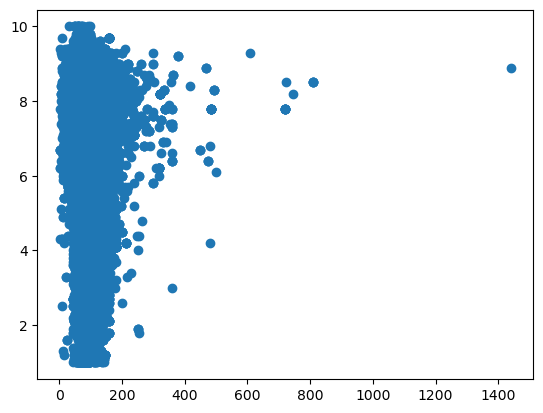

In [104]:
plt.scatter(df2['runtime_minutes'],df2['rating']);

In [105]:
np.corrcoef(df2['runtime_minutes'],df2['rating'])

array([[1.        , 0.12385594],
       [0.12385594, 1.        ]])

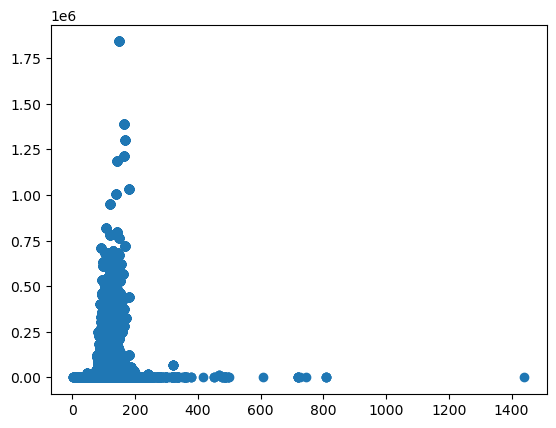

In [106]:
plt.scatter(df2['runtime_minutes'],df2['numvotes']);

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

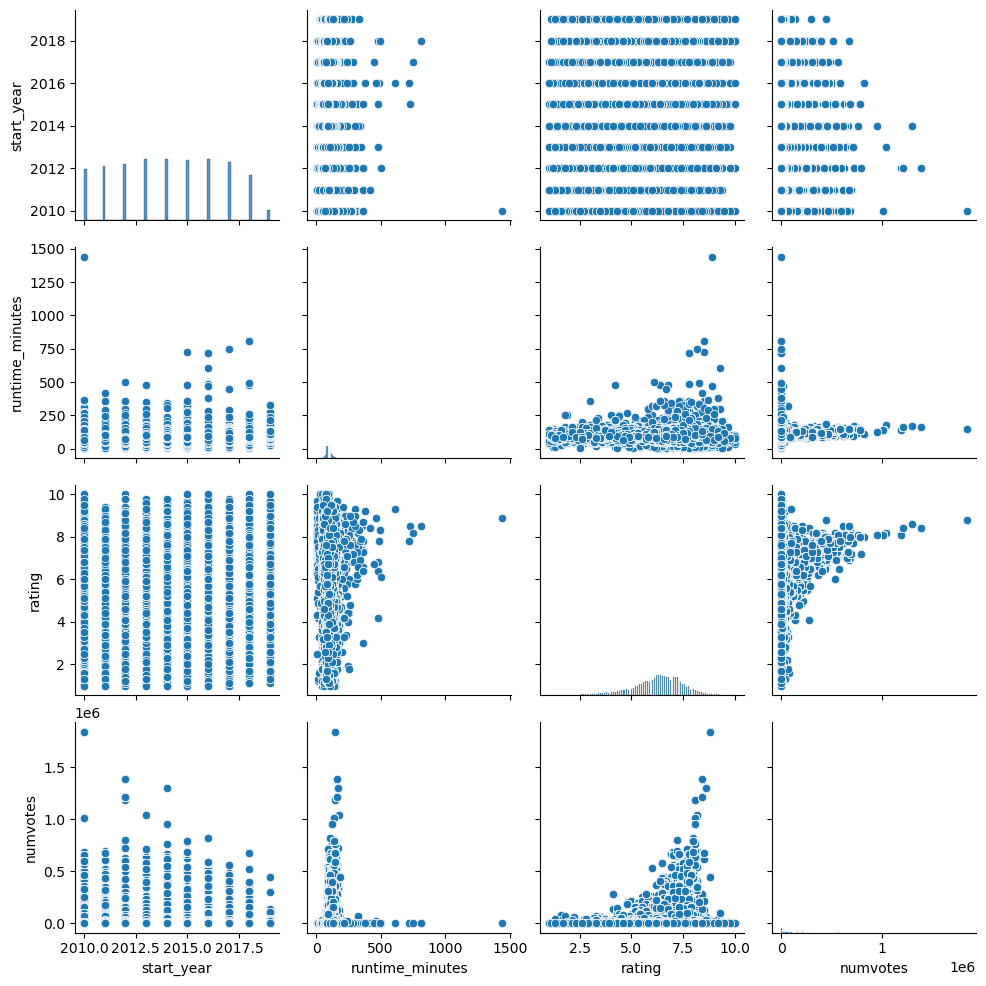

In [107]:
sns.pairplot(df2);

In [108]:
genre = df2.groupby(['genres'])['rating'].mean().sort_values(ascending = False)
type(genre)

pandas.core.series.Series

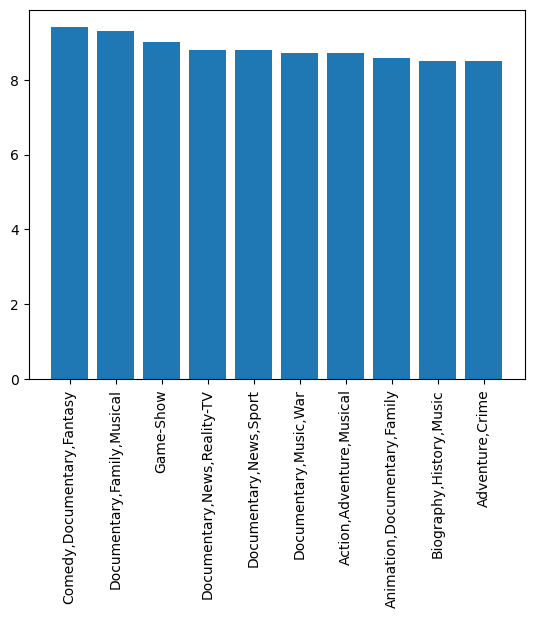

In [109]:
plt.bar(genre.index[:10],genre[:10])
plt.xticks(rotation = 90);

## Statistical Analysis

## Regression Model